# Classification of IRIS dataset using Scikit-Learn 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets, metrics
%matplotlib inline 

C:\Users\wodnj\AppData\Local\Temp\ipykernel_21104\3867540888.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


### IRIS data set
#### https://en.wikipedia.org/wiki/Iris_flower_data_set

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://upload.wikimedia.org/wikipedia/commons/4/41/Iris_versicolor_3.jpg", width = 200, height = 200)

In [3]:
# import Iris dataset from Scikit-Learn's datasets
iris = datasets.load_iris()

print ("Shape of the data ", iris.data.shape)
print ("Shape of the data ", iris.target_names)
print ("Attributes ", iris.feature_names)

# view first 5 rows
print (iris.data[range(5)])
print (iris.target[range(5)])

Shape of the data  (150, 4)
Shape of the data  ['setosa' 'versicolor' 'virginica']
Attributes  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
# show it as a table
df = pd.DataFrame(data = iris.data)
df.columns = iris.feature_names
df['Class'] = iris.target
df['Name'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [6]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class,Name
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica
149,5.9,3.0,5.1,1.8,2,virginica


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Class              150 non-null    int32  
 5   Name               150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB


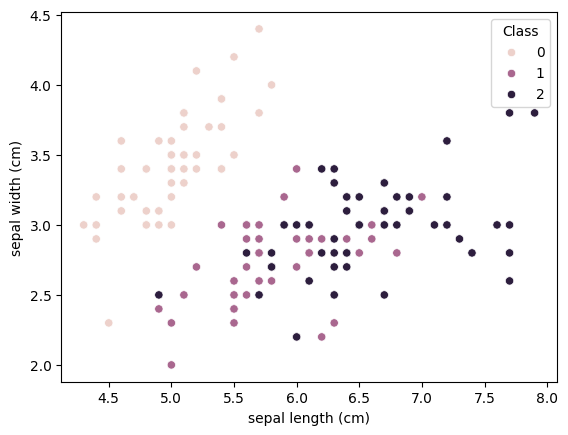

In [8]:
sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'Class');

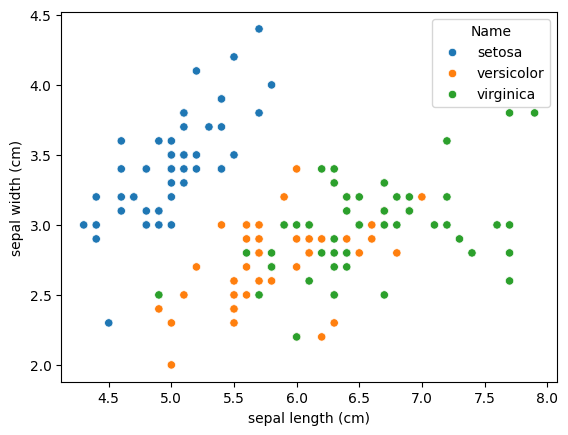

In [9]:
sns.scatterplot(data = df, x = 'sepal length (cm)', y = 'sepal width (cm)', hue = 'Name');

In [10]:
X = iris.data[:, :2]  # take the first two features.
y = iris.target

In [11]:
X[:6, :]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9]])

In [12]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
X = df.loc[:, ['sepal length (cm)', 'sepal width (cm)']]  # take the first two features.
y = df.Class

In [14]:
X.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [15]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Class, Length: 150, dtype: int32

### Create train-test split

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [17]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 96 to 102
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  100 non-null    float64
 1   sepal width (cm)   100 non-null    float64
dtypes: float64(2)
memory usage: 2.3 KB


In [18]:
y_train.shape

(100,)

In [19]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 73 to 109
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  50 non-null     float64
 1   sepal width (cm)   50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


In [20]:
y_test.shape

(50,)

### Generate Model - Logistic Regression

In [21]:
# Logistic Regression
# instantiation
logreg = linear_model.LogisticRegression(C = 1e5)

# fit the classifier on the data
# model fitting
logreg.fit(X_train, y_train)

# output the classifiers prediction on training set
pred_train = logreg.predict(X_train)

# output the classifiers prediction on testing set
pred_test = logreg.predict(X_test)

In [22]:
pred_train

array([1, 2, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0,
       1, 1, 1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1,
       2, 1, 0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 2, 1, 2, 2, 0, 2,
       1, 2, 1, 1, 1, 0, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 0, 1, 1, 0, 1, 2])

In [23]:
# accuracy
(y_train == pred_train).mean()

0.82

In [24]:
(y_test == pred_test).mean()

0.8

In [25]:
# misclassification rate
(y_train != pred_train).mean()

0.18

### Predict

In [26]:
X_test['Predicted'] = pred_test
X_test['Actual'] = y_test
X_test.head()

,sepal length (cm),sepal width (cm),Predicted,Actual
73,6.1,2.8,1,1
18,5.7,3.8,0,0
118,7.7,2.6,2,2
78,6.0,2.9,1,1
76,6.8,2.8,2,1


### Plot decision boundaries

In [27]:
df.groupby("Name").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
Name,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [28]:
legend_labels = ["setosa", "versicolor", "virginica"]

In [29]:
X_test.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'Predicted', 'Actual'], dtype='object')

In [30]:
# plot the decision boundary
# point in the mesh [x_min, m_max]x[y_min, y_max].

def plot_clf_boundary(X, y, legend_labels):
    
    xlabel = X.columns.tolist()[0]
    ylabel = X.columns.tolist()[1]
    
    X = X.values.copy()
    
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

    # put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, )

    fig_kw = {"figsize":(7, 5)}
    fig, ax = plt.subplots(**fig_kw)

    ax.pcolormesh(xx, yy, Z, cmap = plt.cm.rainbow, shading = 'auto')

    # plot also the training points
    kwargs = {'edgecolor':"k",
                 # 'facecolor':"k",
                 'linewidth':1,
                 'linestyle':'--',
                }

    # sns.scatterplot(data = X_test, x = "sepal length (cm)", y = "sepal width (cm)", hue = y_test, palette = plt.cm.rainbow, **kwargs)
    scatter = ax.scatter(X[:, 0], X[:, 1], c = y, edgecolors = 'k', cmap = plt.cm.rainbow)
    plt.xlabel(xlabel, fontdict = {'size': 16})
    plt.ylabel(ylabel, fontdict = {'size': 16})

    # produce a legend with the unique colors from the scatter
    # get the handles and labels
    handles, _ = scatter.legend_elements()
    legend1 = ax.legend(# *scatter.legend_elements(),
                        handles, legend_labels,
                        loc="lower left", title = "Classes")
    ax.add_artist(legend1)

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

c:\Users\wodnj\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Figure size 640x480 with 0 Axes>

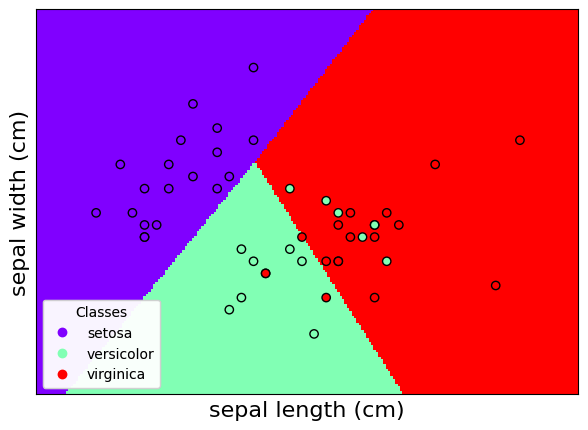

In [31]:
plot_clf_boundary(X = X_test, y = y_test, legend_labels = legend_labels)

### Plot confusion matrix

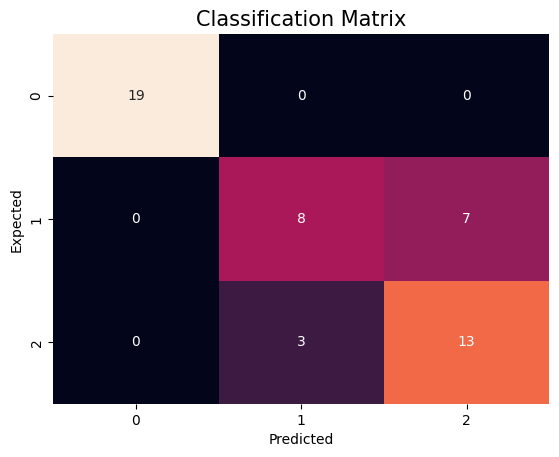

In [32]:
confusion_matrix =  pd.crosstab(index = y_test, columns = pred_test.ravel(), rownames = ['Expected'], colnames = ['Predicted'])
sns.heatmap(confusion_matrix, annot = True, square = False, fmt = '', cbar = False)
plt.title("Classification Matrix", fontsize = 15)
plt.show()

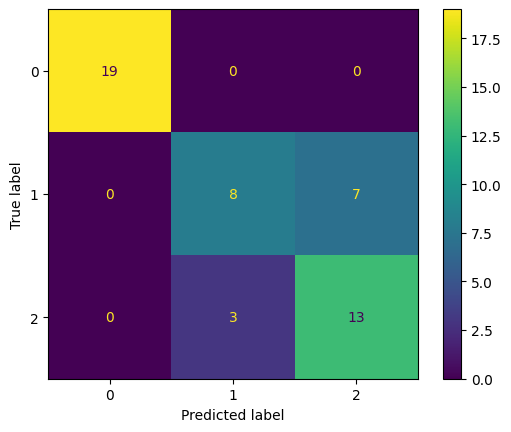

In [33]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true = y_test, y_pred = pred_test)

In [34]:
metrics.confusion_matrix(y_true = y_test, y_pred = pred_test)

array([[19,  0,  0],
       [ 0,  8,  7],
       [ 0,  3, 13]], dtype=int64)

### Classification Report

In [35]:
print (metrics.classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.53      0.62        15
           2       0.65      0.81      0.72        16

    accuracy                           0.80        50
   macro avg       0.79      0.78      0.78        50
weighted avg       0.81      0.80      0.80        50



### Generate Model - Decision Tree

In [36]:
from sklearn.model_selection import train_test_split

X_train_set1, X_test_set1, y_train_set1, y_test_set1 = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [37]:
# Decision Tree
# instantiation
from sklearn import tree

clf = tree.DecisionTreeClassifier()

# fit the classifier on the data
# model fitting
clf = clf.fit(X_train_set1, y_train_set1)

# output the classifiers prediction on training set
pred_train1 = clf.predict(X_train_set1)

# output the classifiers prediction on testing set
pred_test1 = clf.predict(X_test_set1)

In [38]:
X_test_set1['Predicted'] = pred_test1
X_test_set1['Actual'] = y_test_set1
X_test_set1.head()

,sepal length (cm),sepal width (cm),Predicted,Actual
73,6.1,2.8,1,1
18,5.7,3.8,0,0
118,7.7,2.6,1,2
78,6.0,2.9,2,1
76,6.8,2.8,1,1


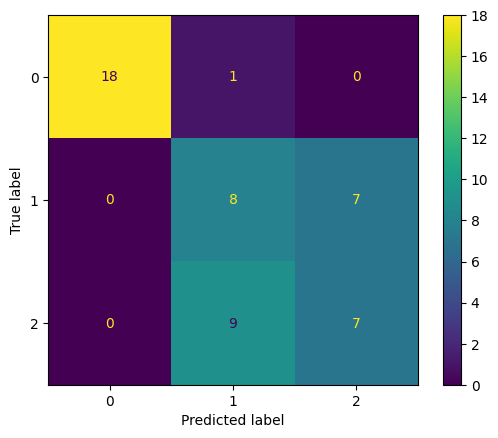

In [39]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true = y_test_set1, y_pred = pred_test1)

In [40]:
print (metrics.classification_report(y_test_set1, pred_test1))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        19
           1       0.44      0.53      0.48        15
           2       0.50      0.44      0.47        16

    accuracy                           0.66        50
   macro avg       0.65      0.64      0.64        50
weighted avg       0.67      0.66      0.66        50



### Generate Model - Support Vector Machine

In [41]:
from sklearn.model_selection import train_test_split

X_train_set2, X_test_set2, y_train_set2, y_test_set2 = train_test_split(
    X, y, test_size = 0.33, random_state = 42)

In [42]:
# Support Vector Machine
# instantiation
from sklearn import svm

clf2 = svm.SVC()

# fit the classifier on the data
# model fitting
clf2.fit(X_train_set2, y_train_set2)

# output the classifiers prediction on training set
pred_train2 = clf2.predict(X_train_set2)

# output the classifiers prediction on testing set
pred_test2 = clf2.predict(X_test_set2)

In [43]:
X_test_set2['Predicted'] = pred_test2
X_test_set2['Actual'] = y_test_set2
X_test_set2.head()

,sepal length (cm),sepal width (cm),Predicted,Actual
73,6.1,2.8,1,1
18,5.7,3.8,0,0
118,7.7,2.6,2,2
78,6.0,2.9,1,1
76,6.8,2.8,2,1


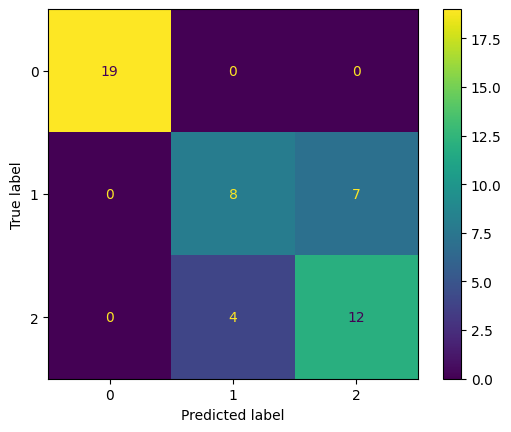

In [44]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true = y_test_set2, y_pred = pred_test2)

In [45]:
print (metrics.classification_report(y_test_set2, pred_test2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.67      0.53      0.59        15
           2       0.63      0.75      0.69        16

    accuracy                           0.78        50
   macro avg       0.77      0.76      0.76        50
weighted avg       0.78      0.78      0.78        50



### Compare the Performances

In [46]:
accuracy_test = metrics.accuracy_score(y_test, pred_test)
accuracy_test_set1 = metrics.accuracy_score(y_test_set1, pred_test1)
accuracy_test_set2 = metrics.accuracy_score(y_test_set2, pred_test2)

print("Logistic Regression's Accuracy:", accuracy_test)
print("Decision Tree's Acuracy:", accuracy_test_set1)
print("Suppor Vector Machine's Accuracy:", accuracy_test_set2)

Logistic Regression's Accuracy: 0.8
Decision Tree's Acuracy: 0.66
Suppor Vector Machine's Accuracy: 0.78
